Week-4 Assignment

A. Find white pixels that do not have 4-connected neighboring pixels:
To achieve this, we can use the Hit-or-Miss transform. First, we'll create a structuring element that represents the pattern of a white pixel surrounded by black pixels (indicating absence of 4-connected neighbors). Then, we'll apply this structuring element to the image using the morphological operation of Hit-or-Miss transform.

In [1]:
# Import OpenCV
import cv2

In [2]:
# Import other necessary packages
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the image
image = cv2.imread('HM.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
# Define the structuring element
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

In [5]:
# Apply the Hit-or-Miss transform
result = cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)

# Find white pixels with no 4-connected neighbors
white_pixels_no_neighbors = np.where(result == 255)

# Display the coordinates of white pixels without 4-connected neighbors
print("Coordinates of white pixels with no 4-connected neighbors:")
for y, x in zip(*white_pixels_no_neighbors):
    print(f"({x}, {y})")

Coordinates of white pixels with no 4-connected neighbors:
(17, 17)
(18, 17)
(19, 17)
(20, 17)
(21, 17)
(22, 17)
(23, 17)
(24, 17)
(25, 17)
(26, 17)
(27, 17)
(28, 17)
(29, 17)
(30, 17)
(81, 17)
(82, 17)
(83, 17)
(84, 17)
(85, 17)
(86, 17)
(87, 17)
(88, 17)
(89, 17)
(90, 17)
(91, 17)
(92, 17)
(93, 17)
(94, 17)
(129, 17)
(130, 17)
(131, 17)
(132, 17)
(133, 17)
(134, 17)
(135, 17)
(136, 17)
(137, 17)
(138, 17)
(139, 17)
(140, 17)
(141, 17)
(142, 17)
(17, 18)
(18, 18)
(19, 18)
(20, 18)
(21, 18)
(22, 18)
(23, 18)
(24, 18)
(25, 18)
(26, 18)
(27, 18)
(28, 18)
(29, 18)
(30, 18)
(81, 18)
(82, 18)
(83, 18)
(84, 18)
(85, 18)
(86, 18)
(87, 18)
(88, 18)
(89, 18)
(90, 18)
(91, 18)
(92, 18)
(93, 18)
(94, 18)
(129, 18)
(130, 18)
(131, 18)
(132, 18)
(133, 18)
(134, 18)
(135, 18)
(136, 18)
(137, 18)
(138, 18)
(139, 18)
(140, 18)
(141, 18)
(142, 18)
(17, 19)
(18, 19)
(19, 19)
(20, 19)
(21, 19)
(22, 19)
(23, 19)
(24, 19)
(25, 19)
(26, 19)
(27, 19)
(28, 19)
(29, 19)
(30, 19)
(81, 19)
(82, 19)
(83, 19)
(84,

B. Perform Prewitt, Sobel, and Canny edge detection on "lena_RGB.tif" image:
We'll use OpenCV to apply Prewitt, Sobel, and Canny edge detection algorithms to the image.

In [6]:
# Load the image
lena_rgb = cv2.imread('lena_RGB.tif')

In [7]:
# Convert to grayscale
lena_gray = cv2.cvtColor(lena_rgb, cv2.COLOR_BGR2GRAY)

In [8]:

# Apply Prewitt edge detection
prewitt_kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])
prewitt_x = cv2.filter2D(lena_gray, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(lena_gray, -1, prewitt_kernel_y)

In [9]:
# Apply Sobel edge detection
sobel_x = cv2.Sobel(lena_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(lena_gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate magnitudes
prewitt_magnitude = np.sqrt(prewitt_x ** 2 + prewitt_y ** 2)
sobel_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

In [10]:
# Apply Canny edge detection
canny_edges = cv2.Canny(lena_gray, 100, 200)

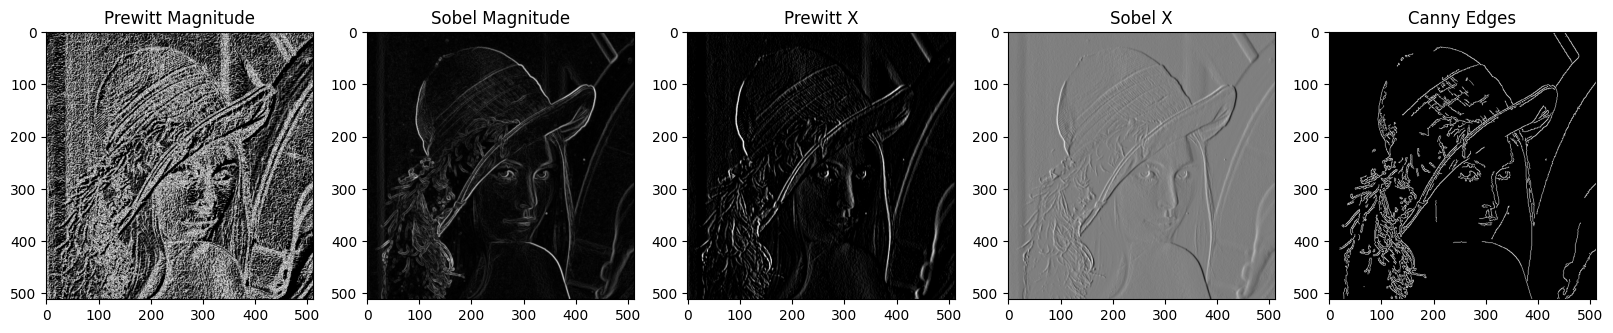

In [11]:
# Display the results
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt Magnitude')
plt.subplot(1, 5, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.subplot(1, 5, 3)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt X')
plt.subplot(1, 5, 4)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.subplot(1, 5, 5)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')
plt.show()

C. Perform Laplacian to sharpen the "moon.tif" image:
We'll use the Laplacian filter to sharpen the image.

In [12]:
# Load the image
moon = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)

In [13]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(moon, cv2.CV_64F)

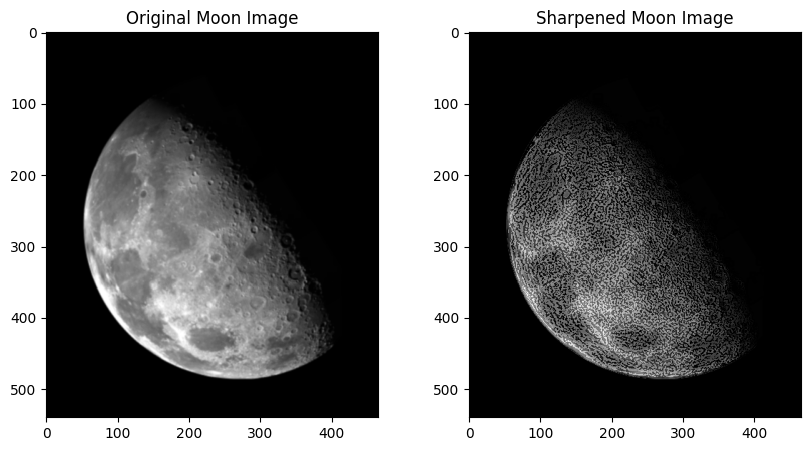

In [15]:
# Convert the Laplacian to the same data type as the original image
laplacian = laplacian.astype(np.uint8)

# Add the Laplacian to the original image to sharpen it
sharpened_moon = cv2.addWeighted(moon, 1, laplacian, -0.5, 0)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(moon, cmap='gray')
plt.title('Original Moon Image')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_moon, cmap='gray')
plt.title('Sharpened Moon Image')
plt.show()